# Data Visualization Exercise

For this exercise, use your creativity and understanding of the different concepts of data visualization.

Create a plot (or a series of subplots) from whatever dataset you choose. As much as possible, please choose a dataset of relevance for visual storytelling. Make the plot using `python`. It doesn't matter if you choose to use `matplotlib` or `seaborn`. 

For the submission:
1. Upload the code that generates the plot to your GitHub repository or to Google Classroom (whichever method you're using for submissions).
2. Upload a png file of the visualization to Google Classroom and write in the Private Comments the caption for the figure you submitted.
3. Make sure to provide the data source in the same folder.

Please make an effort to make it a good and compelling graphic. Choose your colors according to the type of data you're visualizing. Make sure to label everything and avoid clutter. 

As a reference for color choices, you can go to [CARTOColors](https://carto.com/carto-colors/). Simply click on the color map of your choice and it will copy the HEX code of the color.

In [863]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta


### Data Source

Edit this cell to place the direct link to your data source.

You may use the datasets you've downloaded for your project as your submission for this assignment. 

In [864]:
# Read in data
#Testing data
data = pd.read_csv('covid_testing.csv')

data['report_date'] = pd.to_datetime(data['report_date'])
data['weeknum'] = data['report_date'].dt.strftime('%U')
data['year'] = data['report_date'].dt.strftime('%Y')
data['ISO'] = data['year'].astype(str) + '-W' + data['weeknum'].astype(str) + '-1'
data['week'] = data['ISO'].map(lambda x: datetime.datetime.strptime(x, "%G-W%V-%u"))
data['week'] = data['week'] + timedelta(days=7)
data['week'] = pd.to_datetime(data['week']).dt.strftime('%m-%d')
data['week'] = data['week'].astype(str)


samples = data.groupby(['week'], as_index=False)['daily_output_samples_tested'].sum()
positive = data.groupby(['week'], as_index=False)['daily_output_positive_individuals'].sum()

covid = pd.merge(samples, positive, on = 'week')

covid['cumulative_samples_tested'] = covid['daily_output_samples_tested'].cumsum()
covid['cumulative_positive_individuals'] = covid['daily_output_positive_individuals'].cumsum()

covid['pos_rate'] = round(covid['daily_output_positive_individuals']/covid['daily_output_samples_tested'],2)
covid['cum_pos_rate'] = round(covid['cumulative_positive_individuals']/covid['cumulative_samples_tested'],2)


#new_row = {'Week':'Totals', 'daily_output_samples_tested':samples,
 #           'daily_output_positive_individuals':positive,
  #          'cumulative_samples_tested':cum_samples,
   #         'cumulative_positive_individuals':cum_positive,
    #        'pos_rate':pos_rate,
     #       'cum_pos_rate':cum_pos_rate}
#append row to the dataframe
#covid = covid.append(new_row, ignore_index=True)



Caption: Graph data comes from the COVID Public Tesing Data of the DOH. This shows the weekly and cumulative positivity rate % of the whole Philippines. This also graphs the number of weekly samples tested. The figure also tries to tell the datastory of the drivers for rise of Postive Cases over time.

In [866]:
#Covid Cases
data = pd.read_csv('covid_ph.csv')

df1 = pd.get_dummies(data, columns=['RemovalType'])

df1['report_date'] = pd.to_datetime(data['DateRepConf'])
df1['weeknum'] = df1['report_date'].dt.strftime('%U')
df1['year'] = df1['report_date'].dt.strftime('%Y')
df1['ISO'] = df1['year'].astype(str) + '-W' + df1['weeknum'].astype(str) + '-1'
df1['week'] = df1['ISO'].map(lambda x: datetime.datetime.strptime(x, "%G-W%V-%u"))
df1['week'] = df1['week'] + timedelta(days=7)
df1['week'] = pd.to_datetime(df1['week']).dt.strftime('%m-%d')
df1['week'] = df1['week'].astype(str)


died = df1.groupby("week")['RemovalType_DIED'].sum()
confirmed = df1.groupby("week")['CaseCode'].count()

mortality = pd.merge(died, confirmed, on = 'week')

mortality['cumulative_died'] = mortality['RemovalType_DIED'].cumsum()
mortality['cumulative_cases'] = mortality['CaseCode'].cumsum()

mortality['CFR'] = round(mortality['RemovalType_DIED']/mortality['CaseCode'],2)
mortality['cum_CFR'] = round(mortality['cumulative_died']/mortality['cumulative_cases'],2)


covid2 = pd.merge(covid, mortality, on = 'week')



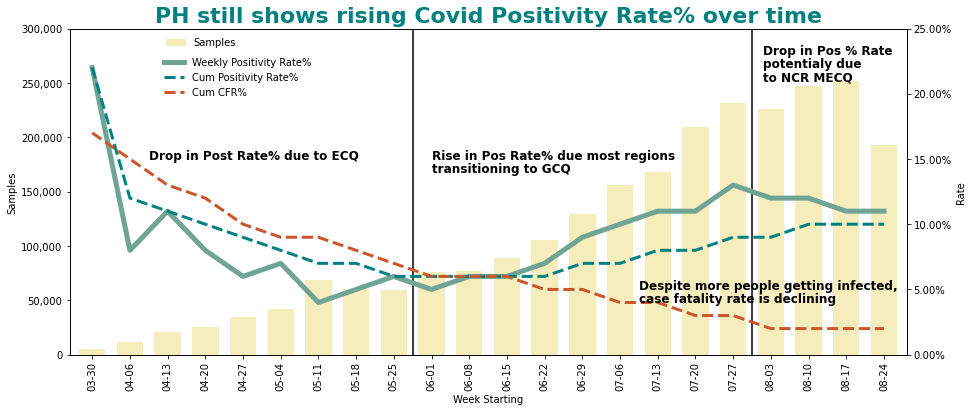

In [884]:
# Visualize your data


fig = plt.figure(figsize=(15, 6))

x = covid['week']
y = covid['daily_output_samples_tested']
axis_1 = covid['daily_output_samples_tested'].plot(kind='bar',color='#f6edbd',label="Samples", width = .7)
axis_1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim((0,300000))


axis_2 = axis_1.twinx()

y = covid['pos_rate']
axis_2.plot(x, y, color="#70a494",label="Weekly Positivity Rate%", linewidth = 5)

y = covid['cum_pos_rate']
axis_2.plot(x, y, color="#008080",label="Cum Positivity Rate%", linewidth = 3, linestyle = '--')

y = covid2['cum_CFR']
axis_2.plot(x, y, color="#ca562c",label="Cum CFR%", linewidth = 3, linestyle = '--')


axis_2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2%}'))
axis_2.set_ylim(0, .25)


axis_1.legend(frameon=False, bbox_to_anchor=(0.21, 1))
axis_2.legend(frameon=False, bbox_to_anchor=(0.3, .94))
plt.title('PH still shows rising Covid Positivity Rate% over time', size = 22, color='#008080', fontweight='bold')

axis_1.set_xlabel('Week Starting')
axis_1.set_ylabel('Samples')
axis_2.set_ylabel('Rate')

axis_1.axvline(x=17.5, color='black')
plt.text(17.8, .23, 'Drop in Pos % Rate', fontweight='bold', fontsize = 12)
plt.text(17.8, .22, 'potentialy due ', fontweight='bold', fontsize = 12)
plt.text(17.8, .21, 'to NCR MECQ', fontweight='bold', fontsize = 12)

axis_1.axvline(x=8.5, color='black')
plt.text(9, .15, 'Rise in Pos Rate% due most regions', fontweight='bold', fontsize = 12)
plt.text(9, .14, 'transitioning to GCQ', fontweight='bold', fontsize = 12)

plt.text(1.5, .15, 'Drop in Post Rate% due to ECQ', fontweight='bold', fontsize = 12)

plt.text(14.5, .05, 'Despite more people getting infected,', fontweight='bold', fontsize = 12)
plt.text(14.5, .04, 'case fatality rate is declining', fontweight='bold', fontsize = 12)


fig.savefig('Reyes_Luke.png')


Caption: Graph data comes from the COVID Public Tesing Data of the DOH. This shows the weekly and cumulative positivity rate % of the whole Philippines. This also graphs the number of weekly samples tested. The figure also tries to tell the datastory of the drivers for rise of Postive Cases over time as well as case fatality rate.